[View in Colaboratory](https://colab.research.google.com/github/ringochu/Deep-Learning-Experiments/blob/master/KerasMNIST.ipynb)

In [1]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras.utils import to_categorical

Using TensorFlow backend.




---


*   Numerical python (Numpy) Library for matrics manipulation.
*  Keras Sequential for us to build a linear stack of layer
* Import Core nerual network layers such
* Import CNN layers for classifications
* Keras utils



---



X_train image Shape (60000, 28, 28)
X_test image Shape (10000, 28, 28)


(-0.5, 27.5, 27.5, -0.5)

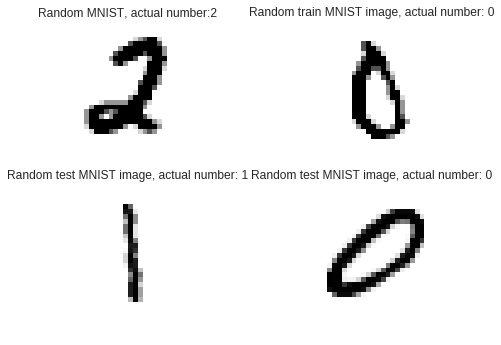

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

from random import randint

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("X_train image Shape" , str(X_train.shape) )
print("X_test image Shape" , str(X_test.shape) )

a, b, c, d = randint(0,59999), randint(0,59999), randint(0,9999), randint(0,9999)

plt.subplot(221)
plt.imshow(X_train[a])
plt.title('Random MNIST, actual number:' + str(Y_train[a]))
plt.axis('off')

plt.subplot(222)
plt.imshow(X_train[b])
plt.title('Random train MNIST image, actual number: '+ str(Y_train[b]))
plt.axis('off')

plt.subplot(223)
plt.imshow(X_test[c])
plt.title('Random test MNIST image, actual number: ' + str(Y_test[c]))
plt.axis('off')

plt.subplot(224)
plt.imshow(X_test[d])
plt.title('Random test MNIST image, actual number: ' + str(Y_test[d]))
plt.axis('off')



---


From keras.datasets load the fasmous MNIST datasets, There're also other datasets available from Keras. [Link to Keras.dataset](https://keras.io/datasets/)

X_train contains train images, y_train contains the label (Actual number) correspond to the train images.

We would also like to see the size as well as some images from the dataset.



---




In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

print("Y_train" + str(Y_train.shape))

Y_train(60000, 10)



Preprocessing data
---


For a typical color image, they come with dimension (x, y, 3), The third dimension stands for depths, which are Red, Blue, Green

However for MNIST, dimension is only (x, y , 1), in another word, we need to reshape the dataset

---

Since MNIST images come in black and white, so each pixel is numbered between 0-255, We need to narrow down to 0-1 for our neural network.

---

One-hot encode, each label is a number, we covert it to a 1x10 dimension array, for example

0 is equivlent to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 is equivlent to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]



---




In [4]:
model = Sequential()
 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=( 28,28,1) ))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=1, verbose=1)



/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2055 - acc: 0.9382


In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('CNN Loss value:', score[0])
print('Accuracy:', score[1])

CNN Loss value: 0.046360752520803364
Accuracy: 0.9847


In [37]:

X = np.array([X_test[0],X_test[1]])
model.predict_classes(X)

array([7, 2])